In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
tables= Base.classes

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent= session.query(Measurement).order_by(Measurement.date.desc()).first()
print(most_recent.date)

2017-08-23


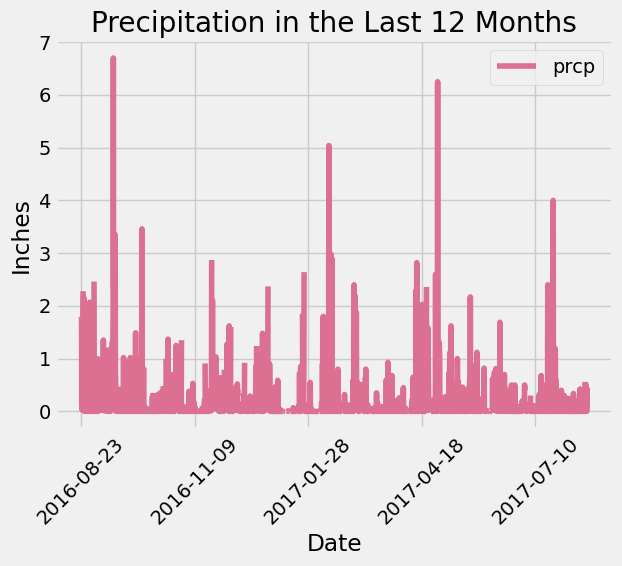

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()


most_recent_date = most_recent.date 

if isinstance(most_recent_date, str):
    most_recent_date = pd.to_datetime(most_recent_date)


twelve_months_ago = most_recent_date - pd.DateOffset(months=12)


twelve_months_ago_str = twelve_months_ago.strftime('%Y-%m-%d')


last_year = session.query(Measurement.date, Measurement.prcp).filter(
    Measurement.date >= twelve_months_ago_str
).all()


prcp_df = pd.DataFrame(last_year, columns=['date', 'prcp'])


prcp_df = prcp_df.sort_values('date')

prcp_df.plot(x='date', y='prcp', color='palevioletred')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats= prcp_df.describe()
summary_stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
no_stations = session.query(Station).distinct().count()
print(no_stations)

9


In [36]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts indescending order.
active_stations=session.query(
    Station.station,
    func.count(Measurement.station).label('Counts')
).join(Measurement, Station.station == Measurement.station).group_by(Station.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'
most_active_stats = session.query(
    func.min(Measurement.tobs).label('min_temp'),
    func.max(Measurement.tobs).label('max_temp'),
    func.avg(Measurement.tobs).label('average_temp')
).filter(Measurement.station == most_active_station_id).all()

print(most_active_stats)

[(54.0, 85.0, 71.66378066378067)]


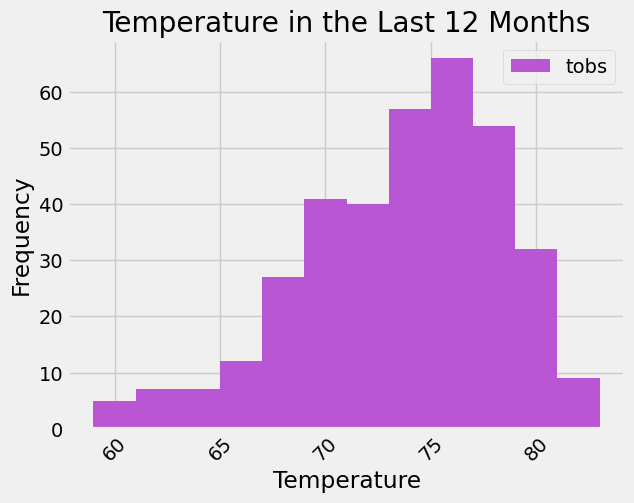

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_date = session.query(
    Measurement.date
).filter(Measurement.station == most_active_station_id).order_by(Measurement.date.desc()).first()


most_active_datetime = most_active_date[0] 

if isinstance(most_active_datetime, str):
    most_active_datetime = pd.to_datetime(most_active_datetime)

twelve_months_ago_active = most_active_datetime - pd.DateOffset(months=12)

twelve_months_ago_str = twelve_months_ago_active.strftime('%Y-%m-%d')

last_year_active = session.query(Measurement.date, Measurement.tobs).filter(
    Measurement.date >= twelve_months_ago_str
).filter(Measurement.station == most_active_station_id).all()


tobs_df = pd.DataFrame(last_year_active, columns=['date', 'tobs'])


tobs_df = tobs_df.sort_values('date')

tobs_df.plot(y='tobs', kind='hist', bins=12, color='mediumorchid')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature in the Last 12 Months')
plt.xticks(rotation=45)
plt.show()

# Close Session

In [60]:
# Close Session
session.close()